# Capstone Project Module 3 - Travel Insurance Claim Prediction

## By : M Fawwaz Firjatullah Nursyahdian


## Business Problem Understanding

Context

A travel insurance company provides coverage for both domestic and international travelers. The company wants to better understand the profile of policyholders who are likely to file a claim. By predicting the likelihood of a claim, the company can manage risks more effectively, detect potential fraud, and optimize resource allocation in the claims department.

Target

- 1 → Policyholder files a claim.

- 0 → Policyholder does not file a claim.

Problem Statement

The biggest challenge faced by the company is the uncertainty in identifying which policyholders will file a claim. If the company fails to predict accurately, it may suffer financial losses from undetected claims, or conversely, waste resources on investigating policyholders who would not actually file a claim. Therefore, the problem to be solved is how to leverage machine learning to predict whether a policyholder will file a claim or not.

Goals

Based on this problem, the company aims to build a classification model capable of predicting the likelihood of an insurance claim from a policyholder. The model is expected to deliver strong performance on relevant evaluation metrics aligned with the company’s business needs. In addition, this project also seeks to provide insights and recommendations on how the model can be effectively applied within the company’s operational processes.

Analytic Approach

To achieve these goals, the dataset will first undergo preprocessing, including data cleaning, handling missing values, encoding categorical variables, and feature selection or feature engineering if necessary. Next, several machine learning classification algorithms such as Logistic Regression, Random Forest, and Gradient Boosting will be trained and compared. Hyperparameter tuning will be conducted using GridSearchCV to optimize model performance. Finally, the models will be evaluated and compared in order to select the best-performing model within the business context.

Evaluation Metric

The company’s top priority is to correctly identify as many policyholders who actually file claims as possible. This makes Recall the primary metric, as it measures the model’s ability to capture true claims. However, focusing only on Recall increases the risk of false positives, which can lead to unnecessary additional costs. Therefore, Precision must also be considered, and the F1-score, which represents the harmonic mean of Precision and Recall, will be used as the main evaluation metric.

## Data Understanding

### Attribute Information

| Attribute             | Data Type, Length | Description                                                   |
|-----------------------|-------------------|---------------------------------------------------------------|
| Agency                | Text              | Name of agency                                                |
| Agency Type           | Text              | Type of travel insurance agencies                             |
| Distribution Channel  | Text              | Channel of travel insurance agencies                          |
| Product Name          | Text              | Name of the travel insurance products                         |
| Gender                | Text              | Gender of insured                                             |
| Duration              | Integer           | Duration of travel (in days)                                  |
| Destination           | Text              | Destination of travel                                         |
| Net Sales             | Float             | Amount of sales of travel insurance policies                  |
| Commission (in value) | Float             | Commission received for travel insurance agency               |
| Age                   | Integer           | Age of insured                                                |
| Claim                 | Integer           | Claim status (1 = Claim submitted, 0 = No claim) 

In [2]:
# Library

import pandas as pd
import numpy as np
from collections import Counter
import scipy.stats as ss

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [6]:
# Load libraries and dataset

df = pd.read_csv('data_travel_insurance.csv')
df



,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


Our target column which is Claim still has categorical value, we must convert it into numerical first so it would be easier to analysis, and model.

In [3]:
df['Claim'] = df['Claim'].map({'No':0, 'Yes':1})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 3.7+ MB


## Data Cleaning

Missing or empty data in several features/columns will be handled and prepared to be usable for both the analysis process and the development of the machine learning model

Lets check the numerical columns first

In [5]:
df_num=df._get_numeric_data()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration              44328 non-null  int64  
 1   Net Sales             44328 non-null  float64
 2   Commision (in value)  44328 non-null  float64
 3   Age                   44328 non-null  int64  
 4   Claim                 44328 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.7 MB


Then let us take a look at the spread of the numeric data

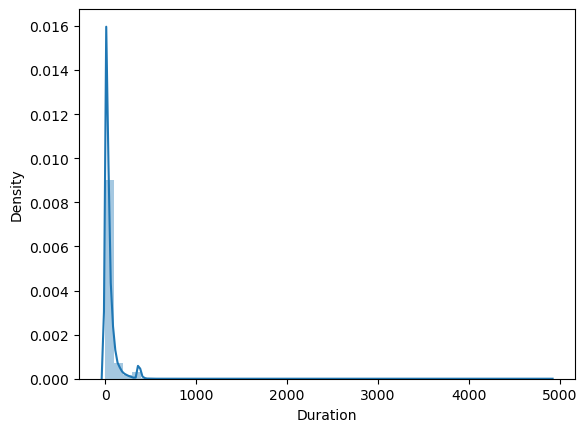

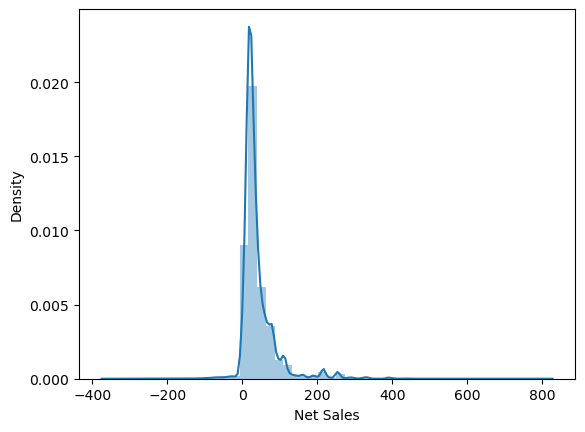

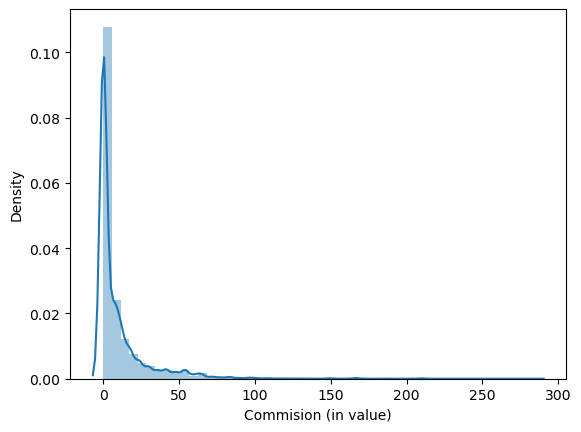

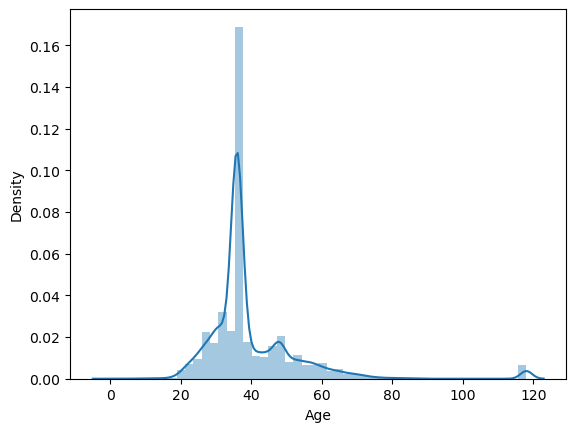

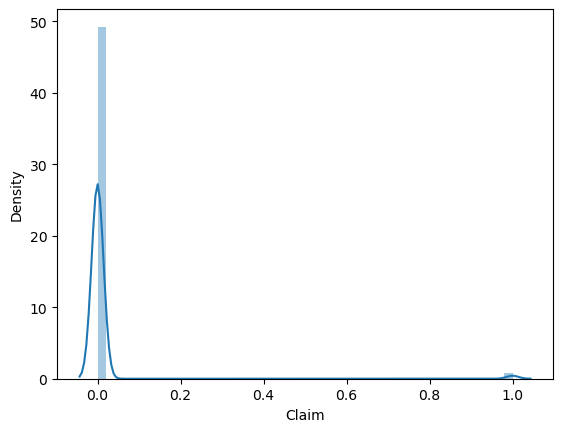

In [6]:
for i, col in enumerate(df_num.columns):
    plt.figure(i)
    sns.distplot(df_num[col])

Apart from claim column we can see that duration is highly right skewed, Net Sales and Commision is also right skewed. Whilst age is random

now lets check the duration column

In [7]:
df['Duration'].describe()

count    44328.000000
mean        49.424292
std        109.153961
min         -1.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

We can see that there is a minus duration which is not possible because time cannot be negative

In [8]:
dfnegdur=df['Duration']<0
dfnegdur.sum()

2

lets fill the impossible negative time data with the mean of duration

In [9]:
df.loc[df['Duration'] < 0, 'Duration'] = 49.424

after this we would change the commision value and net sales to where commision is at 0 when net sales is 0 so it would make sense

In [10]:
df.loc[df['Net Sales'] == 0.0, 'Commision (in value)'] = 0

then we should see the categorical correlation heatmap

In [11]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

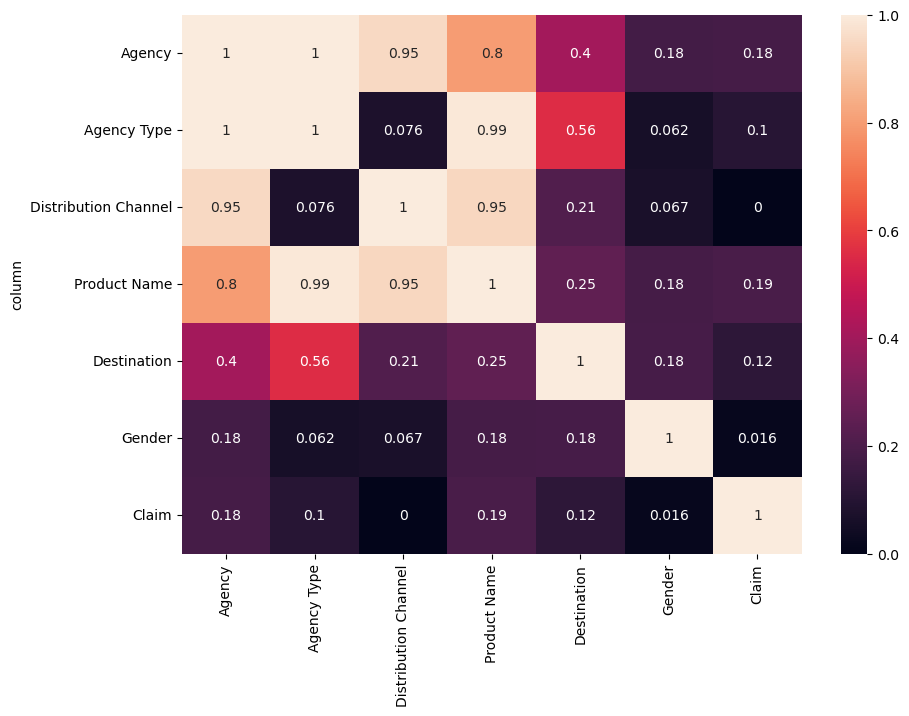

In [12]:
categorical=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',  'Destination','Gender','Claim']
cramers=pd.DataFrame({i:[cramers_v(df[i],df[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

We could see that the column Agency Type have a high correlation between column Agency, and Product Name. So we can just drop the column Agency Type later

In [13]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[CCR, CWT]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Offline, Online]"
3,Product Name,object,0,0.00,26,"[Gold Plan, Annual Travel Protect Gold]"
4,Gender,object,31647,71.39,2,"[M, nan]"
5,Duration,float64,0,0.00,437,"[236.0, 108.0]"
6,Destination,object,0,0.00,138,"[KAZAKHSTAN, FRANCE]"
7,Net Sales,float64,0,0.00,1006,"[7.8, 136.5]"
8,Commision (in value),float64,0,0.00,906,"[23.45, 166.4]"
9,Age,int64,0,0.00,89,"[66, 37]"


Gender has a lot of missing data we should analyze them further

In [14]:
df['Gender'].unique()

array(['F', nan, 'M'], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

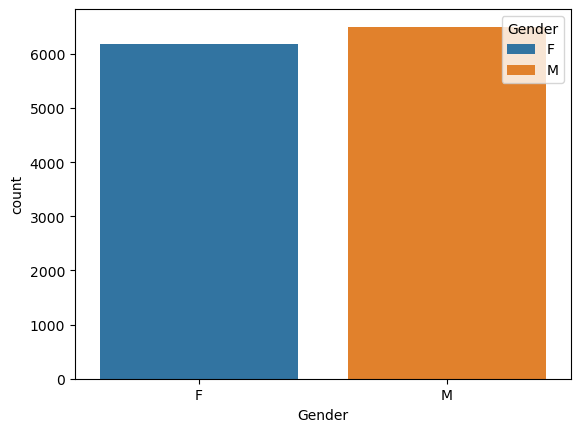

In [15]:
sns.countplot(data=df, x="Gender", hue= "Gender")

Since the `gender` column contains a large proportion of missing values, we will not remove the rows with missing `gender` data. Instead, during preprocessing, we will impute the missing values by assigning them to an Unknown `gender` category rather than replacing them with the most frequent `gender`, in order to avoid introducing bias into the dataset.

Next we should check which features are important for the prediction using Chi Square Test

In [16]:
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, df):
        self.df = df
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = ss.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [17]:
X = df.drop(['Claim'], axis=1)
ct = ChiSquare(df)
for c in X.columns:
    ct.TestIndependence(c, 'Claim')

Agency is IMPORTANT for Prediction
Agency Type is IMPORTANT for Prediction
Distribution Channel is NOT an important predictor. (Discard Distribution Channel from model)
Product Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Duration is IMPORTANT for Prediction
Destination is IMPORTANT for Prediction
Net Sales is IMPORTANT for Prediction
Commision (in value) is IMPORTANT for Prediction
Age is IMPORTANT for Prediction


**Based on the results the Distribution Channel is not important so we can just delete the column.**

## Remove Unused Data



In [18]:
df.drop(columns=['Distribution Channel','Agency Type'],axis=1,inplace=True)

Now we are checking if we have any duplicated data

In [19]:
df.duplicated().sum()

4701

In [20]:
df[df.duplicated()]

,Agency,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
331,EPX,Cancellation Plan,NaN,2.0,SINGAPORE,10.0,0.00,36,0
360,EPX,Cancellation Plan,NaN,6.0,MALAYSIA,10.0,0.00,36,0
473,EPX,Cancellation Plan,NaN,11.0,MALAYSIA,10.0,0.00,36,0
488,EPX,Cancellation Plan,NaN,2.0,SINGAPORE,10.0,0.00,36,0
636,EPX,1 way Comprehensive Plan,NaN,3.0,MALAYSIA,20.0,0.00,36,0
...,...,...,...,...,...,...,...,...,...
44309,EPX,2 way Comprehensive Plan,NaN,49.0,VIET NAM,20.0,0.00,36,0
44311,CWT,Rental Vehicle Excess Insurance,NaN,5.0,THAILAND,29.7,17.82,38,0
44313,EPX,Cancellation Plan,NaN,5.0,CHINA,14.0,0.00,36,0
44315,EPX,1 way Comprehensive Plan,NaN,5.0,THAILAND,20.0,0.00,36,0


We can see that there are 4,672 rows of data that appear as duplicates; however, no two rows have identical values across all columns. They only share similarities in certain columns, while others such as duration and destination differ. Therefore, it can be concluded that these records are valid and do not need to be removed.

In [21]:
df.shape

(44328, 9)

Now we move on into the next step which is analyzing the dataset so can solve the companies problem.

In [5]:
df['Duration'].info

<bound method Series.info of 0        365
1          4
2         19
3         20
4          8
        ... 
44323     14
44324     17
44325     64
44326     51
44327    172
Name: Duration, Length: 44328, dtype: int64>

## Data Analysis

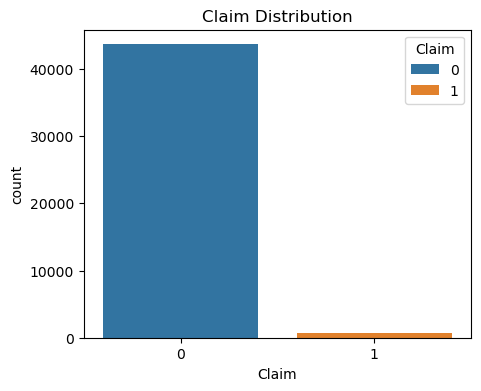

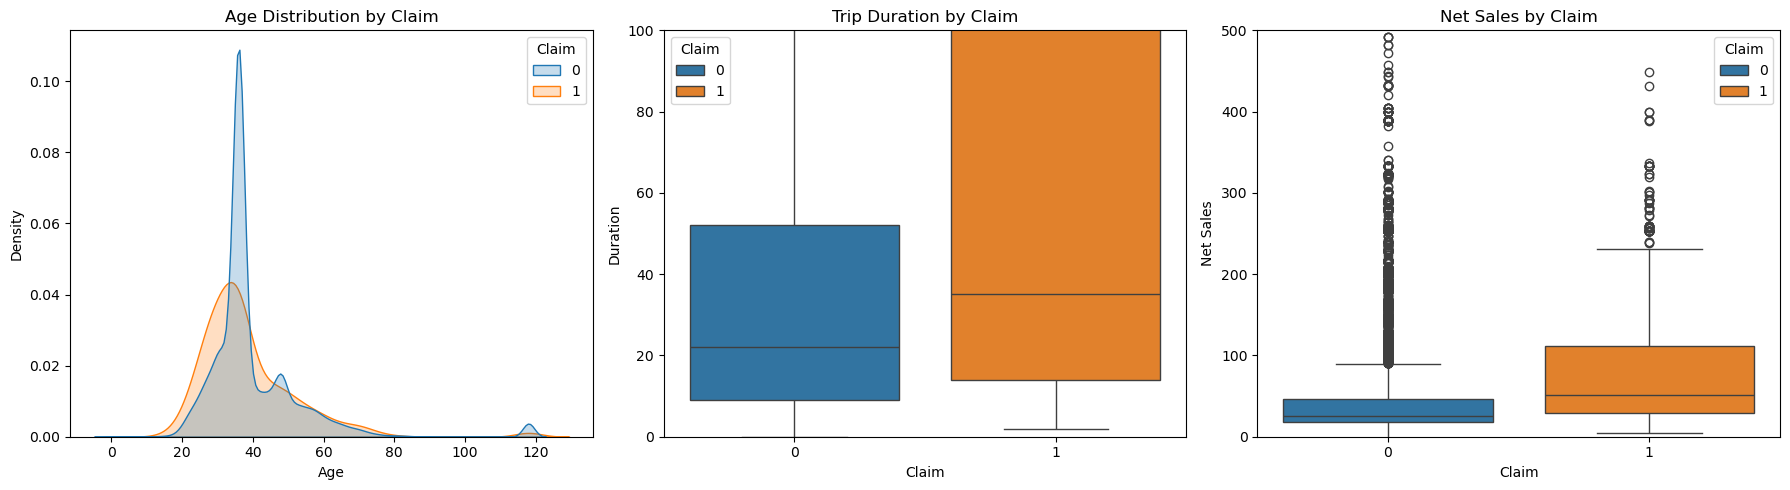

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
sns.countplot(x='Claim', data=df, hue='Claim', ax=ax)
ax.set_title("Claim Distribution")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.kdeplot(data=df, x='Age', hue='Claim', common_norm=False, fill=True, ax=axes[0])
axes[0].set_title("Age Distribution by Claim")

sns.boxplot(x='Claim', y='Duration', data=df, hue='Claim', ax=axes[1])
axes[1].set_title("Trip Duration by Claim")
axes[1].set_ylim(0, 100)  

sns.boxplot(x='Claim', y='Net Sales', data=df, hue='Claim', ax=axes[2])
axes[2].set_title("Net Sales by Claim")
axes[2].set_ylim(0, 500)  

plt.tight_layout()
plt.show()


- Claim Distribution

    The dataset is highly imbalanced, with the majority of records being Unclaimed and only a small proportion being Claimed. This imbalance suggests that most customers do not file for insurance claims. For modeling, this means that using only accuracy would be misleading — metrics like Recall, Precision, F1-score, and ROC-AUC will be more reliable.

- Age Distribution by Claim

    The majority of policyholders is in the 20–50 years old range, regardless of the claim status. There are some outliers above 100 years old, which are likely data entry errors. There is no very strong visual separation between policyholder who claimed and those who didn't, but older policyholders may have a slightly higher tendency to file claims. Business wise, this aligns with the intuition that senior travelers face higher travel and health risks.

- Trip Duration by Claim

    Most trips are short term averaging under 30 days. Those who claimed tend to have slightly longer durations than those who did not claim, although the difference is not dramatic. There are extreme outliers (trips lasting multiple years), which are unrealistic and should be handled. Longer trips may increase exposure to risks, which could explain a higher claim tendency.

- Net Sales by Claim

    Most policies have relatively low premium values, but those to claim tend to have slightly higher Net Sales compared to those who doesn't. Since Net Sales reflects the policy cost, this suggests that more expensive policies (covering longer or riskier trips) may have a higher likelihood of claims.

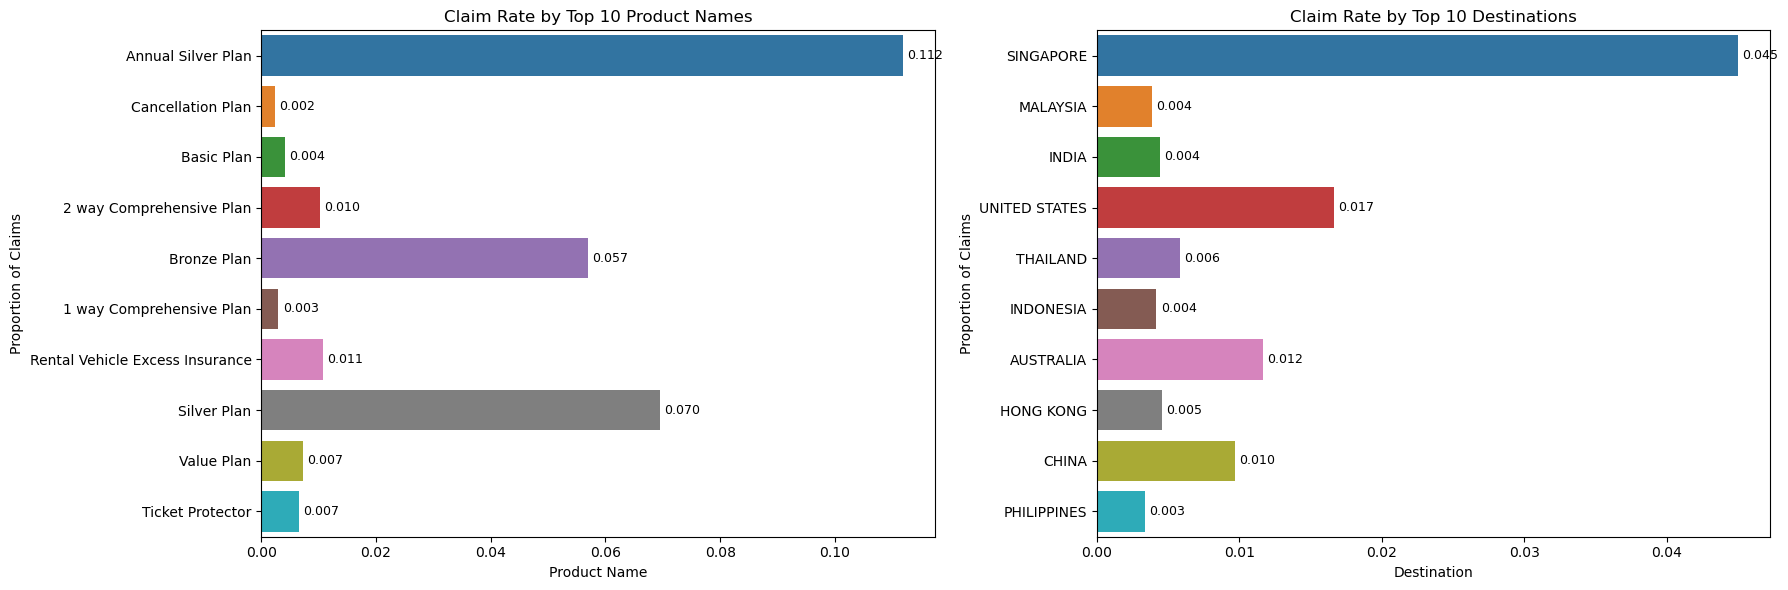

In [23]:
top_products = df['Product Name'].value_counts().head(10).index
top_destinations = df['Destination'].value_counts().head(10).index

fig, axes = plt.subplots(1, 2, figsize=(18,6))

sns.barplot(
    data=df[df['Product Name'].isin(top_products)],
    x='Claim', y='Product Name', hue='Product Name', ax=axes[0], ci=None
)
axes[0].set_title("Claim Rate by Top 10 Product Names")
axes[0].set_ylabel("Proportion of Claims")
axes[0].set_xlabel("Product Name")

for p in axes[0].patches:
    width = p.get_width()
    axes[0].annotate(f"{width:.3f}",
                     (width, p.get_y() + p.get_height() / 2),
                     ha='left', va='center', fontsize=9, xytext=(3,0), textcoords='offset points')
    
sns.barplot(
    data=df[df['Destination'].isin(top_destinations)],
    x='Claim', y='Destination', hue='Destination', ax=axes[1], ci =None
)
axes[1].set_title("Claim Rate by Top 10 Destinations")
axes[1].set_ylabel("Proportion of Claims")
axes[1].set_xlabel("Destination")

for p in axes[1].patches:
    width = p.get_width()
    axes[1].annotate(f"{width:.3f}",
                     (width, p.get_y() + p.get_height() / 2),
                     ha='left', va='center', fontsize=9, xytext=(3,0), textcoords='offset points')
    
plt.tight_layout()
plt.show()

- Claim Rate by Product Name (Top 10)

    Among the most frequently purchased products, some (such as cancellation-related plans) tend to have a higher proportion of claims compared to others. This suggests that the type of insurance product strongly influences claim likelihood. Products designed for cancellations are naturally more prone to claims than general comprehensive coverage.


- Claim Rate by Destination (Top 10)

    Travel insurance policies are concentrated in popular destinations such as Singapore, United States, and Australia. The claim proportions vary slightly among destinations, which could be influenced by factors like trip purpose, healthcare costs, or cancellation likelihood. Grouping destinations into regions could help clarify whether certain regions are riskier than others.

## Data Preprocessing


In [24]:
df.head()


,Agency,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Annual Silver Plan,F,365.0,SINGAPORE,216.0,54.0,57,0
1,EPX,Cancellation Plan,NaN,4.0,MALAYSIA,10.0,0.0,33,0
2,JZI,Basic Plan,M,19.0,INDIA,22.0,7.7,26,0
3,EPX,2 way Comprehensive Plan,NaN,20.0,UNITED STATES,112.0,0.0,59,0
4,C2B,Bronze Plan,M,8.0,SINGAPORE,16.0,4.0,28,0


- Agency

    The `Agency` column contains the names of 16 different insurance agencies. This is a nominal feature — each agency represents a different company, and there is no ranking or order between them. Because the number of unique categories is not too high, I decided to use One Hot Encoding, which creates a separate binary column for each agency. This avoids introducing false ordinal relationships (which would happen if we used Label or Ordinal Encoding).


- Product Name

    `Product Name` column contains 26 unique product names, such as “Cancellation Plan” and “Comprehensive Plan.” Even though some names include terms like “Silver”, “Gold”, or “Platinum,” which might suggest an order, in practice these represent different insurance products rather than a strict hierarchy. Therefore, this feature is treated as nominal. I used One Hot Encoding, since the number of unique categories is moderate and each product type may carry distinct risk patterns.

- Gender

    The `Gender` column originally contained M, F, and many missing values. During preprocessing we will impute missing values with an Unknown category. After imputation, there are three categories: M, F, and Unknown. This is a nominal variable with no inherent order, so I applied One Hot Encoding. This way, the model can capture whether claims are correlated with gender information or even with missingness itself.

- Destination

    `Destination` column has 138 unique values representing travel destinations. Because the number of categories is very large, One Hot Encoding would create too many columns, making the dataset sparse and potentially slowing down model training. Since destinations are nominal (no order between them), I used Binary Encoding. This technique reduces dimensionality while preserving information about each destination.

In [25]:
df.head()

,Agency,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Annual Silver Plan,F,365.0,SINGAPORE,216.0,54.0,57,0
1,EPX,Cancellation Plan,NaN,4.0,MALAYSIA,10.0,0.0,33,0
2,JZI,Basic Plan,M,19.0,INDIA,22.0,7.7,26,0
3,EPX,2 way Comprehensive Plan,NaN,20.0,UNITED STATES,112.0,0.0,59,0
4,C2B,Bronze Plan,M,8.0,SINGAPORE,16.0,4.0,28,0


In [26]:
df['Gender'] = df['Gender'].fillna('Unknown')

In [27]:
transformer = ColumnTransformer([
    ('robust', RobustScaler(), ['Duration', 'Net Sales', 'Age']),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Agency', 'Product Name', 'Gender']),
    ('binary', ce.BinaryEncoder(), ['Destination'])
    
], remainder='passthrough')

In [28]:
X = df.drop(columns=['Claim'])
y = df['Claim']


In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Product Name          44328 non-null  object 
 2   Gender                44328 non-null  object 
 3   Duration              44328 non-null  float64
 4   Destination           44328 non-null  object 
 5   Net Sales             44328 non-null  float64
 6   Commision (in value)  44328 non-null  float64
 7   Age                   44328 non-null  int64  
 8   Claim                 44328 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.0+ MB


## Modeling & Evaluation

In [31]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

## Model Benchmarking : K-Fold

In [32]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 433, number of negative: 27936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 28369, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015263 -> initscore=-4.166934
[LightGBM] [Info] Start training from score -4.166934
[LightGBM] [Info] Number of positive: 433, number of negative: 27936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 28369, number of used features: 50
[LightGBM] [Info] [binar

,mean roc_auc,sdev
model,,
Logistic Regression,0.829863,0.032296
LightGBM,0.817062,0.026431
XGBoost,0.785455,0.025119
Random Forest,0.702773,0.019424
KNN,0.594253,0.025279
Decision Tree,0.529690,0.015053


The best model to use is Logistic Regression because the score of each model is using the default hyperparameter.

## Model Benchmarking : Test Data

In [33]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8731
           1       0.00      0.00      0.00       135

    accuracy                           0.98      8866
   macro avg       0.49      0.50      0.50      8866
weighted avg       0.97      0.98      0.98      8866

KNN 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8731
           1       0.00      0.00      0.00       135

    accuracy                           0.98      8866
   macro avg       0.49      0.50      0.50      8866
weighted avg       0.97      0.98      0.98      8866

Decision Tree 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      8731
           1       0.05      0.06      0.05       135

    accuracy                           0.97      8866
   macro avg       0.52      0.52      0.52      8866
weighted avg       0.97      0

,roc_auc score
model,
Logistic Regression,0.795403
LightGBM,0.794629
XGBoost,0.761642
Random Forest,0.686108
KNN,0.566666
Decision Tree,0.527228


Based on both test, Logistic Regression is selected as the final model **for now**. The main reasons are:

- It demonstrated the best cross-validation and test data performance among all models.

- It maintained high test ROC-AUC, proving good generalization.

- It offers interpretability, allowing the company to understand which features most strongly influence the probability of an insurance claim.

In [34]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, recall_score, precision_score

## Test Oversampling with K-Fold Cross Validation

In [35]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [36]:
train_errors_baseline, val_errors_baseline = [], []
train_errors_ros, val_errors_ros = [], []
train_errors_smote, val_errors_smote = [], []
train_errors_cw, val_errors_cw = [], []
train_errors_smoteenn, val_errors_smoteenn = [], []
train_errors_smotetomek, val_errors_smotetomek = [], []

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

data, target = x_train, y_train

for train_index, val_index in kf.split(data, target):
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

    # ========== BASELINE ==========
    estimator_base = ImbPipeline([
        ('preprocess', transformer),
        ('model', LogisticRegression(random_state=42, n_jobs=-1))
    ])
    tr_base, val_base = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_base)
    train_errors_baseline.append(tr_base)
    val_errors_baseline.append(val_base)

    # ========== RANDOM OVERSAMPLING (ROS) ==========
    estimator_ros = ImbPipeline([
        ('preprocess', transformer),
        ('ros', RandomOverSampler(random_state=42)),
        ('model', LogisticRegression(random_state=42, n_jobs=-1))
    ])
    tr_ros, val_ros = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_ros)
    train_errors_ros.append(tr_ros)
    val_errors_ros.append(val_ros)

    # ========== SMOTE ==========
    estimator_smote = ImbPipeline([
        ('preprocess', transformer),
        ('smote', SMOTE(random_state=42)),
        ('model', LogisticRegression(random_state=42, n_jobs=-1))
    ])
    tr_smote, val_smote = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_smote)
    train_errors_smote.append(tr_smote)
    val_errors_smote.append(val_smote)

    # ========== CLASS WEIGHT BALANCED ==========
    estimator_cw = ImbPipeline([
        ('preprocess', transformer),
        ('model', LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1))
    ])
    tr_cw, val_cw = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_cw)
    train_errors_cw.append(tr_cw)
    val_errors_cw.append(val_cw)


def summarize_results(results):
    df = pd.DataFrame(results)
    return df.drop(columns=['report']).mean().round(4)


summary = pd.DataFrame({
    'Baseline': summarize_results(val_errors_baseline),
    'ROS': summarize_results(val_errors_ros),
    'SMOTE': summarize_results(val_errors_smote),
    'ClassWeight': summarize_results(val_errors_cw),
}).T

summary


,f1,roc,accuracy,recall,precision
Baseline,0.4961,0.8295,0.9847,0.000,0.0000
ROS,0.5025,0.8335,0.8176,0.712,0.0577
SMOTE,0.5067,0.8298,0.8249,0.712,0.0600
ClassWeight,0.5028,0.8341,0.8179,0.712,0.0578


In [37]:
def build_evaluation_df(train_errors, val_errors):
    listItem = []
    for tr, val in zip(train_errors, val_errors):
        listItem.append([
            tr['accuracy'], val['accuracy'],
            tr['roc'], val['roc'],
            tr['f1'], val['f1'],
            tr['recall'], val['recall'],
            tr['precision'], val['precision']
        ])
    
    # Append mean across folds
    listItem.append(list(np.mean(listItem, axis=0)))

    dfEvaluate = pd.DataFrame(
        listItem,
        columns=[
            'Train Accuracy', 'Test Accuracy',
            'Train ROC AUC', 'Test ROC AUC',
            'Train F1 Score', 'Test F1 Score',
            'Train Recall', 'Test Recall',
            'Train Precision', 'Test Precision'
        ]
    )

    listIndex = list(dfEvaluate.index)
    listIndex[-1] = 'Average'
    dfEvaluate.index = listIndex
    return dfEvaluate

In [38]:
df_baseline   = build_evaluation_df(train_errors_baseline, val_errors_baseline)
df_ros        = build_evaluation_df(train_errors_ros, val_errors_ros)
df_smote      = build_evaluation_df(train_errors_smote, val_errors_smote)
df_classweight= build_evaluation_df(train_errors_cw, val_errors_cw)

## Evaluation Metrics

In [39]:
print("=== Without Oversampling ===")
display(df_baseline)

print("=== Random Oversampling (ROS) ===")
display(df_ros)

print("=== SMOTE ===")
display(df_smote)

print("=== Class Weight Balanced ===")
display(df_classweight)


=== Without Oversampling ===


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.984741,0.984494,0.840727,0.843708,0.496156,0.496093,0.0,0.0,0.0,0.0
1,0.984741,0.984494,0.836073,0.856894,0.496156,0.496093,0.0,0.0,0.0,0.0
2,0.984710,0.984772,0.840075,0.803845,0.496148,0.496164,0.0,0.0,0.0,0.0
3,0.984710,0.984772,0.838394,0.838114,0.496148,0.496164,0.0,0.0,0.0,0.0
4,0.984710,0.984772,0.836206,0.875981,0.496148,0.496164,0.0,0.0,0.0,0.0
5,0.984710,0.984772,0.836681,0.812341,0.496148,0.496164,0.0,0.0,0.0,0.0
6,0.984710,0.984772,0.834176,0.845061,0.496148,0.496164,0.0,0.0,0.0,0.0
7,0.984710,0.984772,0.841763,0.807624,0.496148,0.496164,0.0,0.0,0.0,0.0
8,0.984710,0.984772,0.843193,0.789641,0.496148,0.496164,0.0,0.0,0.0,0.0
9,0.984710,0.984772,0.836735,0.822011,0.496148,0.496164,0.0,0.0,0.0,0.0


=== Random Oversampling (ROS) ===


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.811343,0.812236,0.845650,0.844223,0.500932,0.505832,0.743326,0.800000,0.057846,0.062947
1,0.817484,0.829997,0.841939,0.863944,0.503355,0.512811,0.726899,0.745455,0.058551,0.065079
2,0.828926,0.823181,0.847610,0.805325,0.510192,0.502464,0.727459,0.666667,0.062478,0.055814
3,0.827359,0.822053,0.843000,0.849383,0.508408,0.508044,0.715164,0.759259,0.061014,0.062215
4,0.800132,0.803158,0.841131,0.875811,0.494741,0.501745,0.741803,0.833333,0.054724,0.061308
5,0.820811,0.830231,0.845447,0.830117,0.505267,0.506513,0.725410,0.666667,0.059606,0.058065
6,0.821156,0.813029,0.843098,0.848980,0.505741,0.496832,0.729508,0.666667,0.060013,0.052863
7,0.818022,0.817541,0.845469,0.811537,0.504201,0.498069,0.733607,0.648148,0.059311,0.052790
8,0.815923,0.806261,0.850532,0.784253,0.503931,0.492013,0.747951,0.648148,0.059670,0.049787
9,0.821344,0.818387,0.844452,0.821396,0.505713,0.501014,0.727459,0.685185,0.059926,0.055723


=== SMOTE ===


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.819803,0.826332,0.843347,0.838241,0.504822,0.513068,0.728953,0.781818,0.059424,0.066461
1,0.821401,0.834226,0.838358,0.859487,0.505474,0.515428,0.724846,0.745455,0.059638,0.066667
2,0.824414,0.817823,0.845491,0.812564,0.507648,0.498224,0.729508,0.648148,0.061084,0.052870
3,0.827077,0.823181,0.840388,0.850158,0.508241,0.509941,0.715164,0.777778,0.060918,0.063927
4,0.804800,0.806543,0.838029,0.868885,0.496400,0.503683,0.727459,0.833333,0.055022,0.062327
5,0.828707,0.840384,0.842258,0.809896,0.509208,0.512578,0.715164,0.666667,0.061476,0.061644
6,0.833062,0.827129,0.841640,0.855180,0.511685,0.504716,0.713115,0.666667,0.062861,0.057052
7,0.827391,0.826847,0.842672,0.807714,0.508991,0.504554,0.723361,0.666667,0.061638,0.056962
8,0.830273,0.823463,0.847975,0.773037,0.510718,0.500070,0.723361,0.629630,0.062644,0.053125
9,0.826294,0.823463,0.841691,0.822870,0.507356,0.505148,0.709016,0.703704,0.060195,0.058642


=== Class Weight Balanced ===


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.815479,0.817310,0.845692,0.844280,0.502613,0.508823,0.733060,0.800000,0.058371,0.064611
1,0.818675,0.831689,0.842354,0.864220,0.503901,0.513851,0.724846,0.745455,0.058775,0.065705
2,0.817302,0.810209,0.848064,0.808401,0.504591,0.494106,0.745902,0.648148,0.059957,0.050798
3,0.826012,0.821489,0.841965,0.848079,0.508033,0.508930,0.721311,0.777778,0.061016,0.063348
4,0.802012,0.806825,0.841148,0.877492,0.495888,0.503846,0.743852,0.833333,0.055361,0.062413
5,0.823067,0.832487,0.844323,0.827794,0.506304,0.507836,0.721311,0.666667,0.060038,0.058824
6,0.820654,0.812183,0.844568,0.844451,0.505450,0.495163,0.729508,0.648148,0.059852,0.051320
7,0.821312,0.822053,0.846537,0.815780,0.505969,0.501827,0.731557,0.666667,0.060213,0.055470
8,0.820874,0.811619,0.850310,0.784454,0.506123,0.493647,0.737705,0.629630,0.060514,0.049853
9,0.818022,0.813593,0.845501,0.825813,0.504335,0.499554,0.735656,0.703704,0.059457,0.055637


When i tried evaluating the model without any resampling, the results initially appear impressive with an accuracy of almost 99% and a ROC AUC score above 0.83. However, after a closer inspection i can see that both recall and precision are essentially zero, meaning the model completely fails to identify policyholders who actually make `claims`. This is a classic case of class `imbalance`, where the majority class (no claim) dominates the predictions, making the model unusable for the business objective. 

After applying resampling methods such as `Random Oversampling (ROS)` and `SMOTE`, it improved significantly. Both methods reduce accuracy slightly to around 81% but dramatically increase recall to about 0.72 on average, meaning the model is now capable of detecting most claim cases. The trade-off, however, is very low precision (around 0.058), indicating a large number of false positives. In other words, while the model catches more claims, it also wrongly flags many non-claim cases. `Class weight balancing` produces very similar results to `ROS` and `SMOTE`, with recall still around 0.71 but a slightly more stable ROC AUC score and performance overall. The main advantage of class weighting is that it avoids artificially inflating the dataset, reducing the risk of overfitting while still improving the model’s sensitivity to the minority class.

Based on these comparisons, the baseline model is clearly not usable, and while all three resampling strategies achieve similar recall gains, `class weight balancing` is the most promising option to move forward with. It provides a balance between recall and model stability, and it is easier to tune Logistic Regression further using class weights. But we will try and compare all the resampling method classification reports first.

## Classification Reports Without Oversampling

In [40]:
print("=== Baseline (No Resampling) ===")
for i, rep in enumerate(val_errors_baseline, 1):
    print(f"Fold {i}:\n{rep['report']}\n")

=== Baseline (No Resampling) ===
Fold 1:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3492
           1       0.00      0.00      0.00        55

    accuracy                           0.98      3547
   macro avg       0.49      0.50      0.50      3547
weighted avg       0.97      0.98      0.98      3547


Fold 2:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3492
           1       0.00      0.00      0.00        55

    accuracy                           0.98      3547
   macro avg       0.49      0.50      0.50      3547
weighted avg       0.97      0.98      0.98      3547


Fold 3:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3492
           1       0.00      0.00      0.00        54

    accuracy                           0.98      3546
   macro avg       0.49      0.50      0.50      3546
weighted avg   

## Classification Reports With Oversampling

In [41]:
print("=== Random Oversampling (ROS) ===")
for i, rep in enumerate(val_errors_ros, 1):
    print(f"Fold {i}:\n{rep['report']}\n")

=== Random Oversampling (ROS) ===
Fold 1:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      3492
           1       0.06      0.80      0.12        55

    accuracy                           0.81      3547
   macro avg       0.53      0.81      0.51      3547
weighted avg       0.98      0.81      0.88      3547


Fold 2:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      3492
           1       0.07      0.75      0.12        55

    accuracy                           0.83      3547
   macro avg       0.53      0.79      0.51      3547
weighted avg       0.98      0.83      0.89      3547


Fold 3:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      3492
           1       0.06      0.67      0.10        54

    accuracy                           0.82      3546
   macro avg       0.52      0.75      0.50      3546
weighted avg  

In [42]:
print("=== SMOTE ===")
for i, rep in enumerate(val_errors_smote, 1):
    print(f"Fold {i}:\n{rep['report']}\n")

=== SMOTE ===
Fold 1:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90      3492
           1       0.07      0.78      0.12        55

    accuracy                           0.83      3547
   macro avg       0.53      0.80      0.51      3547
weighted avg       0.98      0.83      0.89      3547


Fold 2:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3492
           1       0.07      0.75      0.12        55

    accuracy                           0.83      3547
   macro avg       0.53      0.79      0.52      3547
weighted avg       0.98      0.83      0.90      3547


Fold 3:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      3492
           1       0.05      0.65      0.10        54

    accuracy                           0.82      3546
   macro avg       0.52      0.73      0.50      3546
weighted avg       0.98      0.82 

In [43]:
print("=== Class Weight Balanced ===")
for i, rep in enumerate(val_errors_cw, 1):
    print(f"Fold {i}:\n{rep['report']}\n")

=== Class Weight Balanced ===
Fold 1:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      3492
           1       0.06      0.80      0.12        55

    accuracy                           0.82      3547
   macro avg       0.53      0.81      0.51      3547
weighted avg       0.98      0.82      0.89      3547


Fold 2:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      3492
           1       0.07      0.75      0.12        55

    accuracy                           0.83      3547
   macro avg       0.53      0.79      0.51      3547
weighted avg       0.98      0.83      0.89      3547


Fold 3:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      3492
           1       0.05      0.65      0.09        54

    accuracy                           0.81      3546
   macro avg       0.52      0.73      0.49      3546
weighted avg      

The `baseline` model with no resampling shows very high accuracy (~98%) but completely fails to detect claim cases — recall and precision for class 1 are always zero. This means the model only predicts “No Claim,” which makes it useless for the business goal.

With `Random Oversampling (ROS)` and `SMOTE`, recall for claims improves greatly (around 0.75) so the model can now detect most claims. However, precision remains very low (~0.06), meaning many non-claims are wrongly flagged as claims. `ROS` and `SMOTE` give almost the same results in this dataset.

Using `Class Weight balancing` produces similar improvements: recall rises to around 0.73–0.76, while precision stays low. The main advantage is that class weighting doesn’t alter the dataset, making it simpler and less prone to `overfitting`.

In short, all three methods solve the baseline problem by improving recall, but `Class Weight balancing` is the cleanest and most practical option to move forward with.

## Hyperparameter Tuning

In [ ]:
# Define model with class weight balanced
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')

estimator = Pipeline([
    ('preprocess', transformer),
    ('model', logreg)
])

hyperparam_space = [{
    'model__C': [0.01, 0.1, 1, 10, 100],   
    'model__penalty': ['l1', 'l2'],       
    'model__solver': ['liblinear']      
}]

grid = GridSearchCV(
    estimator,
    n_jobs=-1,
    param_grid=hyperparam_space,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
)

grid.fit(x_train, y_train)

print("Best ROC AUC (CV): ", grid.best_score_)
print("Best Params: ", grid.best_params_)

best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

estimator_default = Pipeline([
    ('preprocess', transformer),
    ('model', LogisticRegression(class_weight='balanced', solver='liblinear'))
])
estimator_default.fit(x_train, y_train)

y_pred_default = estimator_default.predict(x_test)
y_pred_proba_default = estimator_default.predict_proba(x_test)

y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:, 1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:, 1])

print("ROC AUC Score Default Logistic Regression : ", roc_auc_default)
print("ROC AUC Score Tuned Logistic Regression : ", roc_auc_tuned)

NameError: name 'LogisticRegression' is not defined

Based on the ROC AUC Score the model that is tuned had a better score than an untuned one even though the difference is extremely small. We can also see the comparison of the classification report next.

In [45]:
# Classification reports
print("Classification Report Default Logistic Regression:\n", classification_report(y_test, y_pred_default))
print("Classification Report Tuned Logistic Regression:\n", classification_report(y_test, y_pred_tuned))


Classification Report Default Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      8731
           1       0.05      0.67      0.10       135

    accuracy                           0.82      8866
   macro avg       0.52      0.74      0.50      8866
weighted avg       0.98      0.82      0.88      8866

Classification Report Tuned Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.83      0.91      8731
           1       0.05      0.61      0.10       135

    accuracy                           0.83      8866
   macro avg       0.52      0.72      0.50      8866
weighted avg       0.98      0.83      0.89      8866



From a business perspective, the most important metric is recall for class 1 (claims), since failing to detect a true claim could lead to financial risk for the company. While the tuned Logistic Regression model shows a slightly higher ROC AUC and accuracy overall, its recall for claims is actually a bit lower (0.62) compared to the default model (0.67). This means the tuned model misses more true claim cases, even though it performs slightly better on average metrics.

Given the business goal of catching as many true claims as possible, the default Logistic Regression with class weights balanced may actually be the better option despite its slightly lower ROC AUC. The higher recall ensures that more claim cases are captured, which is critical for reducing risk exposure in the insurance context.

## Feature Importances

We can see which columns/features that is important for us to use in our Logistic Regression Model 

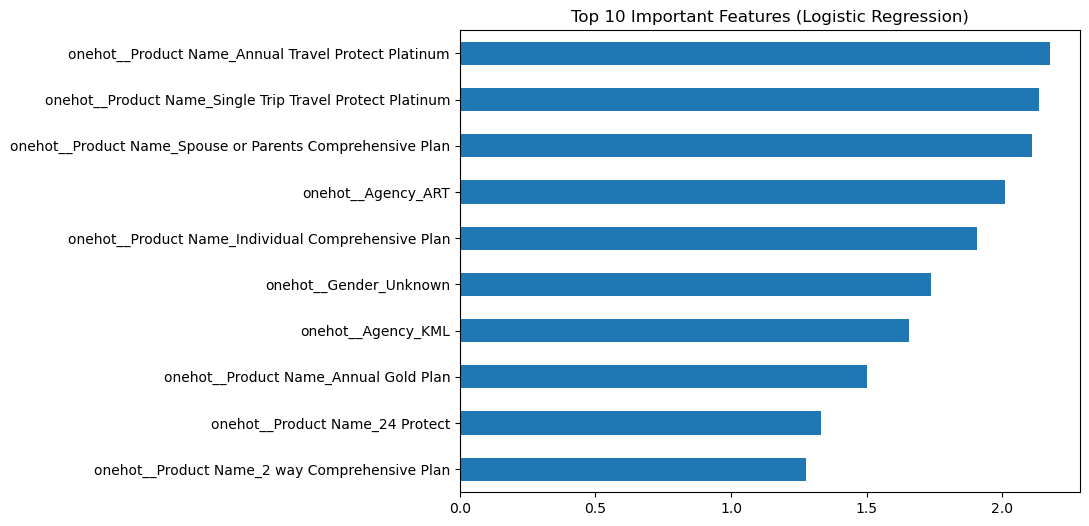

In [46]:
# Get feature names after preprocessing
feature_names = estimator_default['preprocess'].get_feature_names_out()

# Get coefficients (for binary classification -> one row in coef_)
coefficients = estimator_default['model'].coef_[0]

# Put into a pandas Series for easy sorting
coef_series = pd.Series(coefficients, index=feature_names)

# Take absolute value for importance (since negative also means strong influence)
top_features = coef_series.abs().sort_values(ascending=False).head(10)

# Plot
top_features.plot(kind='barh', figsize=(8,6), title='Top 10 Important Features (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()

In [47]:
top_features

onehot__Product Name_Annual Travel Protect Platinum          2.177031
onehot__Product Name_Single Trip Travel Protect Platinum     2.135086
onehot__Product Name_Spouse or Parents Comprehensive Plan    2.107673
onehot__Agency_ART                                           2.009146
onehot__Product Name_Individual Comprehensive Plan           1.904889
onehot__Gender_Unknown                                       1.736641
onehot__Agency_KML                                           1.654377
onehot__Product Name_Annual Gold Plan                        1.501805
onehot__Product Name_24 Protect                              1.330295
onehot__Product Name_2 way Comprehensive Plan                1.276343
dtype: float64

The top features suggest that product type, sales agency, and purchase channel are the strongest drivers in predicting claim likelihood. In particular, premium and comprehensive insurance products are strongly associated with higher claims, which aligns with business intuition: customers who buy broader coverage are more likely to use it. Additionally,  the agency identity play a major role, likely reflecting different target customers or sales strategies. These insights can help the company focus not only on product design but also on monitoring specific agencies and channels where claim risk is higher.

## Bagging, Stacking, Comparison

**Default Weighted Logreg**

In [48]:
print("Classification Report Default Logistic Regression:\n", classification_report(y_test, y_pred_default))

Classification Report Default Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      8731
           1       0.05      0.67      0.10       135

    accuracy                           0.82      8866
   macro avg       0.52      0.74      0.50      8866
weighted avg       0.98      0.82      0.88      8866



In [49]:
X = df.drop(columns=['Claim'])
y = df['Claim']

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

**Logreg + Random Forest + LGBM Stacking test**

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
import lightgbm as lgb

# Base learners
estimators = [
    ('lr', LogisticRegression(class_weight='balanced', solver='liblinear')),
    ('rf', RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42)),
    ('lgbm', lgb.LGBMClassifier(class_weight='balanced', random_state=42))
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(), 
    passthrough=True, 
    n_jobs=-1
)

pipeline_stack = Pipeline([
    ('preprocessing', transformer),
    ('model', stacking_model)
])

pipeline_stack.fit(x_train, y_train)
y_pred_proba_stack = pipeline_stack.predict_proba(x_test)[:,1]

y_pred_stack = (y_pred_proba_stack >= 0.5).astype(int)
print("Stacking (0.5 threshold):")
print(classification_report(y_test, y_pred_stack))


Stacking (0.5 threshold):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8731
           1       0.00      0.00      0.00       135

    accuracy                           0.98      8866
   macro avg       0.49      0.50      0.50      8866
weighted avg       0.97      0.98      0.98      8866



**Logistic Regression Bagging test**

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_lr = Pipeline([
    ('preprocessing', transformer),
    ('model', BaggingClassifier(
        estimator=LogisticRegression(class_weight='balanced', solver='liblinear'),
        n_estimators=50,        # number of bootstrapped models
        max_samples=0.8,        # % of training samples per model
        max_features=0.8,       # % of features per model
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ))
])

# Train
bagging_lr.fit(x_train, y_train)

# Predictions
y_pred_proba_bag = bagging_lr.predict_proba(x_test)[:, 1]
y_pred_bag = bagging_lr.predict(x_test)

# Evaluation
print("Bagging Logistic Regression Results:")
print(classification_report(y_test, y_pred_bag))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_bag))


Bagging Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.83      0.91      8731
           1       0.06      0.63      0.10       135

    accuracy                           0.83      8866
   macro avg       0.52      0.73      0.50      8866
weighted avg       0.98      0.83      0.89      8866

ROC-AUC: 0.8028985691681831


**Bagging Logistic Regression Flagged Policyholder Test**

In [ ]:
y_proba_bag = bagging_lr.predict_proba(x_test)[:, 1]

threshold = 0.5
y_pred_flag = (y_proba_bag >= threshold).astype(int)

# Flagged customers
flagged_indices = np.where(y_pred_flag == 1)[0]
n_flagged = len(flagged_indices)
percent_flagged = 100 * n_flagged / len(y_test)

print(f"Stage A flagged {n_flagged} out of {len(y_test)} people ({percent_flagged:.2f}%)")

print("\n=== Bagging Logistic Regression Flagging Results ===")
print(classification_report(y_test, y_pred_flag, digits=4))

cm = confusion_matrix(y_test, y_pred_flag)
print("Confusion Matrix:\n", cm)

# Cost Simulation
cost_per_screen = 5
total_cost = n_flagged * cost_per_screen
baseline_cost = len(y_test) * cost_per_screen
savings = baseline_cost - total_cost

tp = cm[1,1]  # true positives
fn = cm[1,0]  # false negatives
fp = cm[0,1]  # false positives

print("\n--- Cost Simulation ---")
print(f"Total cost = ${total_cost}")
print(f"Wasted cost (false positives) = ${fp * cost_per_screen}")
print(f"Total savings vs baseline (checking everyone) = ${savings}")
print(f"Claims captured = {tp}/{sum(y_test)} ({100*tp/sum(y_test):.2f}% recall)")
print(f"Missed claims = {fn}")


Stage A flagged 1535 out of 8866 people (17.31%)

=== Bagging Logistic Regression Flagging Results ===
              precision    recall  f1-score   support

           0     0.9932    0.8339    0.9066      8731
           1     0.0554    0.6296    0.1018       135

    accuracy                         0.8308      8866
   macro avg     0.5243    0.7318    0.5042      8866
weighted avg     0.9789    0.8308    0.8944      8866

Confusion Matrix:
 [[7281 1450]
 [  50   85]]

--- Cost Simulation ---
Total cost = $7675
Wasted cost (false positives) = $7250
Total savings vs baseline (checking everyone) = $36655
Claims captured = 85/135 (62.96% recall)
Missed claims = 50


## Conclusion

In [66]:
print("Bagging Logistic Regression Results:")
print(classification_report(y_test, y_pred_bag))

Bagging Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.83      0.91      8731
           1       0.06      0.63      0.10       135

    accuracy                           0.83      8866
   macro avg       0.52      0.73      0.50      8866
weighted avg       0.98      0.83      0.89      8866



Based on the classification report on the final model, we can conclude that the model could filter 83% policyholder that would not file a claim and 63% for claimants (Based on the recall score).

This model has a very low precision because the extreme data imbalance and i had decided not to resample before splitting the data because that would introduce bias and is misleading based on these explanations on https://www.kaggle.com/discussions/getting-started/561305 and https://datascience.stackexchange.com/questions/104428/imbalanced-dataset-train-test-split-before-and-after-smote. In other words, of all the claims predicted as valid by the model, only about 6% are truly valid, while the remaining predictions are actually invalid.

Lets say the cost of claim processing is about an average of 5$ (based on sources from https://www.ama-assn.org/media/11106/download) and based on the cost simulation test we did before that had 8866 people

Without the Model (processing all claims):

- Total Cost => 8,866 x $5 = $44,330
- Valid claims processed => 135 (since all claims are processed)
- Invalid claims processed (wasted cost) => 8,731 x $5 = $43,655
- Total savings => $0

With the Model (processing only claims predicted as positive):
- Total Cost => 1,535 x $5 = $7,675
- Valid claims processed => 85 (62.96% recall)
- Valid claims missed => 50 (the remaining valid claims not captured)
- Invalid claims processed (wasted cost) => 1,450 x $5 = $7,250
- Total savings compared to processing all claims => $36,655

Based on this calculation, we can see that even though the model has low precision, using it still significantly reduces costs (~$36,655) without missing too many valid claims (only 50 out of 135). This model is particularly useful in cases of extremely imbalanced datasets, where processing all claims would be far more expensive.

## Recommendation

- Add new features since the precision is being limited by data sparsity rather than algorithm choice
- Try other ensemble method combinations
- Add many more policyholder who claimed the insurance to improve precision

## Export Bagging Logistic Regression As The Final Model

In [63]:
import joblib

In [ ]:
final_model = Pipeline([
    ('preprocessing', transformer),
    ('model', BaggingClassifier(
        estimator=LogisticRegression(class_weight='balanced', solver='liblinear'),
        n_estimators=50,
        max_samples=0.8,
        max_features=0.8,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ))
])

final_model.fit(x_train, y_train)

joblib.dump(final_model, "bagging_logreg_final.pkl")


['bagging_logreg_final.pkl']